# Notebook for exploring the Chinese-English Dictionary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load lexical units table
colnames = ['id', 'simplified', 'traditional', 'pinyin', 
            'english', 'grammar', 'concept_cn', 'concept_en', 
            'domain_cn', 'domain_en', 'subdomain_cn', 'subdomain_en',
            'image', 'mp3', 'notes', 'headword']
types = {'id': np.uint32, 'simplified': np.object, 'traditional': np.object, 
        'pinyin': np.object, 'english': np.object, 'grammar': np.object,
        'concept_cn': np.object, 'concept_en': np.object,
        'domain_cn': np.object, 'domain_en': np.object, 'subdomain_cn': np.object,
         'subdomain_en': np.object, 'image': np.object, 'mp3': np.object,
         'notes': np.object, 'headword': np.uint32}
df = pd.read_table('../data/words.txt', names=colnames, dtype=types)
df['id'].count() # Number of lexical units

45676

In [10]:
# Unique headwords
len(df['headword'].unique())

37186

In [3]:
# Example row
df[df.simplified == '佛']

,id,simplified,traditional,pinyin,english,grammar,concept_cn,concept_en,domain_cn,domain_en,subdomain_cn,subdomain_en,image,mp3,notes,headword
3617,3618,佛,\N,fó,Buddha / Awakened One,proper noun,\N,\N,佛教,Buddhism,\N,\N,\N,fo2.mp3,"Sanskrit: buddha, Pali: buddha, Japanese: buts...",3618
3618,3619,佛,\N,fó,Buddhist / of Buddhism,adjective,\N,\N,佛教,Buddhism,\N,\N,\N,fo2.mp3,As a modifier describing a concept that relate...,3618


In [4]:
# Counts for different parts of speech
df['grammar'].value_counts()

noun              17702
verb               9978
proper noun        9195
adjective          3990
phrase             1568
adverb              788
set phrase          726
measure word        306
pronoun             214
conjunction         196
phonetic            192
number              113
foreign             111
\N                  111
particle            102
preposition          97
onomatopoeia         70
interjection         55
ordinal              35
pattern              30
auxiliary verb       25
bound form           24
suffix               21
expression           10
prefix               10
radical               5
infix                 2
Name: grammar, dtype: int64

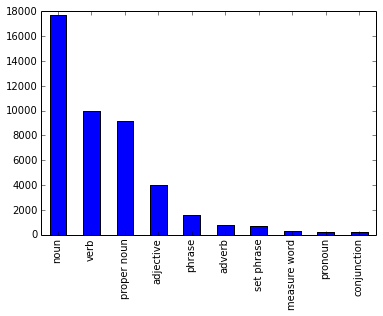

In [5]:
# Histogram for different parts of speech
df['grammar'].value_counts()[:10].plot(kind='bar')

In [6]:
# Counts for lexical units of different domains
df['domain_en'].value_counts()

Classical Chinese         8077
Buddhism                  5059
History                   2652
Actions                   1541
Condition                 1097
Places                     990
Geography                  876
Emotion                    797
Language                   792
Thought                    785
Health                     772
Quantity                   724
Information Technology     719
Time                       654
Characteristic             638
Food and Drink             621
Function Words             608
Idiom                      594
Form                       566
Art                        544
Linguistics                473
Names                      453
Religion                   411
Movement                   402
Ethics                     395
Work                       377
Position                   367
Architecture               366
Nature                     348
Law                        347
                          ... 
Computer Science            16
Chinese 

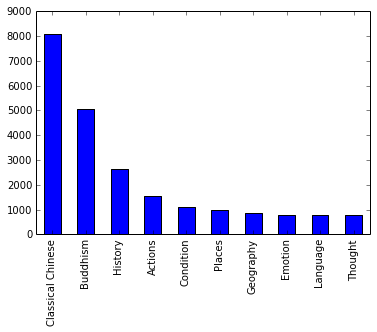

In [7]:
# Histogram for different domains
df['domain_en'].value_counts()[:10].plot(kind='bar')

In [11]:
# Words with no notes
df.ix[df.notes == '\N', :5].head()

,id,simplified,traditional,pinyin,english
267,268,节目,節目,jiémù,program
268,269,欢迎,歡迎,huānyíng,to welcome
269,270,收听,收聽,shōutīng,to listen to
273,274,波,\N,bō,to broadcast
274,275,出,\N,chū,to go out


In [23]:
# Add a Taisho title
# As a word entry in the dictionary
luid = 45678
simplified = u"法镜经"
traditional = u"法鏡經"
pinyin = u"Fǎ Jìng Jīng"
english = u"Ugradattaparipṛcchā (Fa Jing Jing)"
grammar = "proper noun"
concept = u"经\tSutra"
domain = u"佛教\tBuddhism"
subdomain = u"大乘佛教\tMahāyāna Buddhism"
tid = 322
kid = 32
notes = u"From Sanskrit: ugradattaparipṛcchā; a text in the Chinese Buddhist canon (T %d; Lancaster 2004, K %d)" % (
    tid, kid)
print u"%d\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t\\N\t\\N\t%s\t%d" % (
    luid, simplified, traditional, pinyin, english, grammar, concept, domain, subdomain, notes, luid)

45678	法镜经	法鏡經	Fǎ Jìng Jīng	Ugradattaparipṛcchā (Fa Jing Jing)	proper noun	经	Sutra	佛教	Buddhism	大乘佛教	Mahāyāna Buddhism	\N	\N	From Sanskrit: ugradattaparipṛcchā; a text in the Chinese Buddhist canon (T 322; Lancaster 2004, K 32)	45678


In [24]:
# Full title of the Taisho entry
title = u"%s 《%s》" % (english, traditional)
print title

Ugradattaparipṛcchā (Fa Jing Jing) 《法鏡經》


In [26]:
# Collection entry
translator = u"An Xuan"
daterange = u"181"
genre = u"ratnakūṭa"
entry = u"taisho/t0%d.csv\ttaisho/t0%d.html\t%s\tTranslated by %s\ttaisho/t0%d_00.txt\tTaishō\tSūtra\t%s\t%s" % (
    tid, tid, title, translator, tid, daterange, genre)
print entry

taisho/t0322.csv	taisho/t0322.html	Ugradattaparipṛcchā (Fa Jing Jing) 《法鏡經》	Translated by An Xuan	taisho/t0322_00.txt	Taishō	Sūtra	181	ratnakūṭa


In [29]:
# Primary source reference
url = u"http://tripitaka.cbeta.org/T12n0322"
reference = u"%s, 《%s》 '%s,' in <i>Taishō shinshū Daizōkyō</i> 《大正新脩大藏經》, in Takakusu Junjiro, ed., (Tokyo: Taishō Shinshū Daizōkyō Kankōkai, 1988), Vol. 12, No. %d, Accessed 2016-08-31, <a href='%s'>%s</a>." % (
    translator, traditional, english, tid, url, url)
print reference

An Xuan, 《法鏡經》 'Ugradattaparipṛcchā (Fa Jing Jing),' in <i>Taishō shinshū Daizōkyō</i> 《大正新脩大藏經》, in Takakusu Junjiro, ed., (Tokyo: Taishō Shinshū Daizōkyō Kankōkai, 1988), Vol. 12, No. 322, Accessed 2016-08-31, <a href='http://tripitaka.cbeta.org/T12n0322'>http://tripitaka.cbeta.org/T12n0322</a>.
